In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load your data (replace this line with your data loading code)
# data = ...
data = pd.read_excel("J1newdata.xlsx")
df = pd.DataFrame(data)
print(df)



         MONTH  AVERAGE
0    2023-23-1   112.18
1    2023-23-2   112.68
2    2023-23-3   112.68
3    2023-23-4   112.54
4    2023-23-5   112.51
5    2023-23-6   112.42
6    2023-23-7   112.42
7    2023-23-8   112.60
8    2023-23-9   112.60
9   2023-23-10   112.67
10  2023-23-11   112.63
11  2023-23-12   112.61


In [8]:
#test
import pandas as pd


data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%b %d,%y %H:%M:%S %p')
print (data)


KeyError: 'Date_Time'

In [7]:
data['MONTH'] = pd.to_datetime(data['MONTH'], format='%b %d,%y %H:%M:%S %p')
print (data)

ValueError: time data "2023-23-1" doesn't match format "%b %d,%y %H:%M:%S %p", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [1]:



data['MONTH'] = pd.to_datetime(data['Date_Time'], format='%b %d,%y %H:%M:%S %p')
print (data)


NameError: name 'pd' is not defined

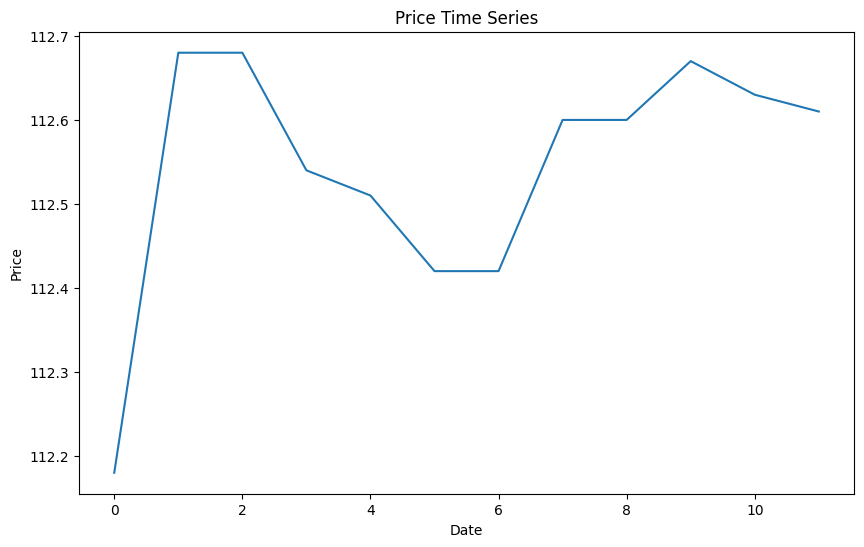

In [6]:
plt.figure(figsize=(10, 6))
data['AVERAGE'].plot()
plt.title('Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
decomposition = seasonal_decompose(data['AVERAGE'], model='additive')  # Choose 'additive' or 'multiplicative'
decomposition.plot()
plt.show()

In [ ]:
window_size = 30  # Adjust window size as needed
data['Moving Average'] = data['Price'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))
data[['Price', 'Moving Average']].plot()
plt.title('Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Identify appropriate ARIMA parameters (ACF, PACF plots)
# ...

model = ARIMA(data['AVERAGE'], order=(1, 1, 1))  # Adjust order based on analysis
model_fit = model.fit()

data['Forecast'] = model_fit.forecast(steps=6)  # Forecast for next 10 periods
plt.figure(figsize=(10, 6))
data[['Price', 'Forecast']].plot()
plt.title('Price with Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
data = pd.read_csv('cpi_data.csv')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0,1))
data['average_cpi'] = scaler.fit_transform(data[['average_cpi']])

# Create training and testing datasets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size,:], data[train_size:len(data),:]

# Create input and output datasets
look_back = 1
X_train, y_train = [], []
for i in range(look_back, len(train)):
    X_train.append(train[i-look_back:i, 0:1].values)
    y_train.append(train[i, 1:2].values)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = [], []
for i in range(look_back, len(test)):
    X_test.append(test[i-look_back:i, 0:1].values)
    y_test.append(test[i, 1:2].values)
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Print the results
print('Train set:')
print('Mean Absolute Error:', np.mean(np.abs(y_train[0] - train_predict)))
print('Mean Squared Error:', np.mean((y_train[0] - train_predict)**2))
print('Root Mean Squared Error:', np.sqrt(np.mean((y_train[0] - train_predict)**2)))
print('Test set:')
print('Mean Absolute Error:', np.mean(np.abs(y_test[0] - test_predict)))
print('Mean Squared Error:', np.mean((y_test[0] - test_predict)**2))
print('Root Mean Squared Error:', np.sqrt(np.mean((y_test[0] - test_predict)**2)))